# Laboratorio 2 - Parte 1

### Modelos no paramétricos

### Regresi&oacute;n con K-Nearest-Neighbors & Ventana de Parzen

### Universidad de Antioquia

### Facultad de Ingeniería

### Ingeniería de Sistemas

### Ude@ - 2018-I

#### Profesor: Antonio Tamayo Herrera


### Integrantes:

#### Nombre: David de Jesus Yepes Isaza
#### Cédula: 1020455542

#### Nombre: Rodrigo Antonio Porras Martinez
#### Cédula: 1039459720



## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

## Ejercicio 1

Genere un conjunto de 1000 muestras artificiales con una distribución que corresponda a la suma de dos Gaussiana con diferente media, ambas de una sola dimension. Grafique el histograma de los datos generados.

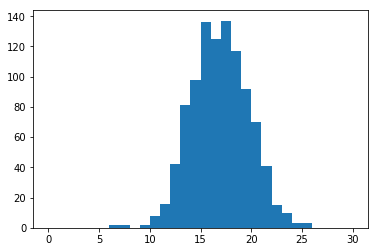

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

#Complete el código para el ejercicio 1 aquí
mu1, sigma1 = 4, 2 # media y desviacion estandar
mu2, sigma2 = 13, 2

#Preguntar al profe si es que el total de muestras o sumar cada dato
datos1=np.random.normal(mu1, sigma1,1000)
datos2=np.random.normal(mu2, sigma2,1000)
total= datos1 + datos2
plt.hist(total,30,(0,30))
plt.show()

## Ejercicio 2

A continuación se define el método dist_euclidiana. En la parte del código dónde está el comentario "completar" debe escribir el código que permita calcular la salida de dicha función. Es decir, lleve a código la siguiente función:

$$ d(x, x^*) = \sqrt{(x_1-x_{1}^{*})^2+(x_2-x_{2}^{*})^2+...+(x_{n-1}-x_{n-1}^{*})^2+(x_n-x_{n}^{*})^2} $$

Nota: Consulte la librería scipy y si lo ve conveniente use los métodos que le puedan ayudar para resolver el laboratorio.


In [5]:
from scipy.spatial import distance

#Método para calcular la distancia entre dos vectores
def dist_euclidiana(x1, x2):
    #Complete el código para calcular la distancia entre x1 y x2
    dist = np.sqrt(sum([(a - b)**2 for a, b in zip(x1, x2)]))
    #dist = distance.euclidean(x1,x2)
    
    return dist


## Ejercicio 3

Analice los siguientes métodos a la luz de la teoría vista para los modelos de K vecinos más cercanos (KNN) y ventana de Parzen. Una vez comprenda su funcionamiento proceda a completar el código del método KNN.


In [15]:
from scipy.stats import mode
import operator

#Error cuadrático medio para los problemas de regresión
def ECM(Y_est,Y):
    N = np.size(Y)
    Y = 100*Y
    Y_est = 100*np.asarray(Y_est)
    ecm = sum((Y_est - Y)**2)/(2*N)
    
    return ecm

#Para calcular el error en los problemas de clasificación
def error(Y_lest, Y):
    error = 0
    for ye, y in zip(Y_lest, Y):
        if ye != y:
            error += 1
    
    error = error/np.size(Y)
    
    return error


def KNN(X_train, Y_train, X_val, Y_val, knn, tipo):
    
    k = knn    #Parámetro k que equivale al número de vecinos a tener en cuenta para resolver el problema de
               #predicción de la variable de salida
    
    Y_est = []
    
    for x1 in X_val:
        distances = dict()    #Estudien la estrucutra de datos diccionario de Python para que comprendan el codigo
        for x2, y2 in zip(X_train, Y_train):
            distances.update({dist_euclidiana(x1,x2): y2})
    
        #k vecinos más cercanos cercanos
        vecinos = sorted(distances.items(), key=operator.itemgetter(0))
        #print (vecinos)
        #print (type(vecinos))
        #print(np.shape(vecinos))
        
        
        #Complete aquí el código para tomar solo la variables de salida de los k vecinos más cercanos
        y_vecinos = []
        for v in vecinos[:knn]:
            y_vecinos.append(v[1])
        #Se calcula la variable de salida
        #Regression
        if tipo == 'regression':
            #Complete el código aquí para calcular la variable de salida en el problema de regresión
            y_est = np.mean(y_vecinos)
            Y_est.append(y_est)
        #Classification
        elif tipo == 'classification':
            #Complete el código aquí para calcular la variable de salida en el problema de clasificación
            #y_est = 
            Y_est.append(y_est)
    
    if tipo == 'regression':
        print ("Modelo KNN para regresión\n\n"+"El Error cuadrático medio del modelo con " + str(k) + " vecinos es = " +  str(ECM(Y_est,Y_val)))
    elif tipo == 'classification':
        print ("Modelo KNN para clasificación\n\n"+"El Error de clasificación del modelo con " + str(k) + " vecinos es = " + '''Complete el codigo para mostrar el error''')
        

## Ejercicio 4

A continuación se leen los datos de un problema de regresión. Las variables o caracterísicas son guardadas en la variable X que posteriormente es normalizada y la variable de salida o variable a predecir es guardada en la variable Y. Note que la base de datos de entrenamiento se parte, de manera aleatoria, en una parte con las muestras para entrenamiento y otra parte con las muestras para validación.

In [19]:
from sklearn.preprocessing import normalize

#cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('DB/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter

#Esta es la base de datos AirQuality del UCI Machine Learning Repository 
#https://archive.ics.uci.edu/ml/datasets/Air+Quality#

#Carga la base de datos completa.
#X = db[:,0:12]
#Y = db[:,12]

#Carga solo las 100 primeras observaciones muestrales de la base de datos
X = db[0:100,0:12]
Y = db[0:100,12]
#print(Y)

#Normalizamos los datos
X = normalize(X, axis=0, norm='l1')

#Partición de la base de datos
Nsample = np.size(X,0);
indices = np.random.permutation(Nsample);

#Conjunto de muestras de entrenamiento
Xtrain = X[indices[1:round(0.7*Nsample)],:]
Ytrain = Y[indices[1:round(0.7*Nsample)]]

#Conjunto de muestras de validación
Xtest = X[indices[round(0.7*Nsample)+1:Nsample],:]
Ytest = Y[indices[round(0.7*Nsample)+1:Nsample]]
print(np.shape(Xtest))

#Complete el código llamando el método KNN con sus respectivos argumentos para el problema de regresión
#En el ejercicios 5 se le pide variar el valor de k y analizar.
k=3
tipo="regression"
KNN(Xtrain,Ytrain,Xtest,Ytest,k,tipo)

(29, 12)
Modelo KNN para regresión

El Error cuadrático medio del modelo con 3 vecinos es = 23.907770881226046


4.1 Describa la base de datos de entrenamiento. Diga cu&aacute;ntas muestras tiene en total y cu&aacute;ntas caracter&iacute;sticas.

4.2 Qu&eacute; porcentaje de la base de datos se usa para el entrenamiento del modelo? A cu&aacute;ntas muestras corresponde esto? Cu&aacute;ntas muestras se usan para la validaci&oacute;n?


Responda Aqu&iacute;:

4.1 R/: Contiene las respuestas de un dispositivo multisensor de gas desplegado en el campo en una ciudad italiana. Los promedios de las respuestas horarias se registran junto con las referencias de concentraciones de gases de un analizador certificado. Xtrain tiene 70 muestras y 12 caracteriscas, Ytrain tiene la misma cantidad de muestras y el y teorico

4.2 R/: Si hablamos de la base de datos original que tiene 9358 muestras, el porcentaje usado es de 0.74% que equivale 70 muestras aproximandamente. Ahora bien, de la db que se usa para el ejercicio se usan 70 muestras que son el 70% y 30%  para la validacion, siendo respectivamente 30 muestras. 

In [17]:
#Complete el código llamando el método KNN con sus respectivos argumentos para el problema de regresión
#En el ejercicios 5 se le pide variar el valor de k y analizar.


tipo="regression"
for k in range(1,8):
    KNN(Xtrain,Ytrain,Xtest,Ytest,k,tipo)

Modelo KNN para regresión

El Error cuadrático medio del modelo con 1 vecinos es = 27.51437586206897
Modelo KNN para regresión

El Error cuadrático medio del modelo con 2 vecinos es = 25.553593965517244
Modelo KNN para regresión

El Error cuadrático medio del modelo con 3 vecinos es = 20.336982758620675
Modelo KNN para regresión

El Error cuadrático medio del modelo con 4 vecinos es = 17.373854633620674
Modelo KNN para regresión

El Error cuadrático medio del modelo con 5 vecinos es = 16.28077317241378
Modelo KNN para regresión

El Error cuadrático medio del modelo con 6 vecinos es = 19.854788840996168
Modelo KNN para regresión

El Error cuadrático medio del modelo con 7 vecinos es = 22.06668121041518


## Ejercicio 5

Identifique la variable k (número de vecinos más cercanos definido para el modelo $k$) en el método KNN. En la celda de c&oacute;digo anterior, llame al método KNN cambiando el valor de $k$ de acuerdo a la siguiente tabla y complete la columna ECM.

<table>
  <tr>
    <th>K (número de vecinos)</th>
    <th>Error Cuadrático Medio (ECM)</th>
  </tr>
  <tr>
    <td>1</td>
    <td>30.570884482758615</td>
  </tr>
  <tr>
    <td>2</td>
    <td>22.191366379310338</td>
  </tr>
  <tr>
    <td>3</td>
    <td>24.577922413793093</td>
  </tr>
  <tr>
    <td>4</td>
    <td>23.391978124999998</td>
  </tr>
  <tr style="background-color: #b9f6ca;">
    <td>5</td>
    <td>19.36591131034484</td>
  </tr>
  <tr>
    <td>6</td>
    <td>20.242934961685812</td>
  </tr>
  <tr>
    <td>7</td>
    <td>20.21437751583392</td>
  </tr>
</table>


Vaya al código de la celda donde se hace la carga de la base de datos y cargue la base de datos completa. Vuelva a correr el algorítmo.

5.1 Qué sucede? 



Responda aquí:
    
5.1 R/: No ejecuta el algoritmo o se tarda mucho en maquinas de mejor procesador

5.2 Por qué ocurre eso?

Responda aquí:
    
5.2 R/: La DB tiene demasiados datos, lo que acarrea un mayor costo de hardware. El costo actual supera la capacidad del procesador del PC local, por esta razón el algoritmo no retorna valores.

5.3 El modelo es viable para resolver este problema?

Responda aquí:
    
5.3 R/: Dependeria de los requisitos de hardware que tiene el problema, pero para este caso, con hardware de gama baja - media este modelo no es viable.

5.4 Note qu&eacute; en el c&oacute;digo de la funci&oacute;n que calcula el error cuadr&aacute;tico medio se est&aacute; multiplicando por $100$ cada entrada del vector Y te&oacute;rico y del vector Y estimado. Analice los valores de la variable de salida Y en la base de datos antes de hacer esta modificaci&oacute;n y explique que implicaciones tendr&iacute;a en el ECM el hecho de no realizar dicha modificaci&oacute;n.

Responda aqu&iacute;

5.4 R/: Los valores de Y son valores entre el intervalo 1 y 0, Al elevar un numero menor que cero tiende a disminuir. Y un numero muy pequeño divido por uno que es mucho mas grande tiende a cero o ser mas pequeño. Al final la interpretacion del ECM para el analisis se hace muy dificil.

## Ejercicio 6

Ahora debe resolver el mismo problema de regresión, pero con el modelo de ventana de Parzen.

Para el problema de regresión debe completar el código para implementar la función Nadaraya-Watson.

Nota: Los métodos dist_euclidiana y ECM continuan siendo válidos para el modelo ventana de Parzen.


In [11]:
def kernel_gaussiano(x):
    return (1/np.sqrt(2*np.pi))*np.exp((-0.5)*x**2)

def Nadaraya_Watson(X_train, Y_train, X_val, Y_val, ancho_h):
        
    h = ancho_h
        
    Y_est = []
    for x1 in X_val:
        y_est = 0
        distances = []
        for x2 in X_train:
            distances.append(dist_euclidiana(x1,x2))
        
        #Tenga en cuenta que distances es una lista y la puede convertir a un arreglo con el método np.asarray (consulte)
        #Complete el codigo aquí
        #implemente la función de Nadaraya-Watson usando el kernel gaussiano   
        #y_est =
        Y_est.append(y_est)
    
    print ("Modelo ventana de Parzen para regresión (Nadaraya-Watson)\n\n"+"El Error cuadrático medio del modelo con h = " + str(h) + " es = " + str(ECM(Y_est, Y_val)))


## Ejercicio 7

Complete el código llamando al método Nadaraya_Watson, pasándole los parámetros correspondientes. Tenga en cuenta que ya en una celda previa se hizo la lectura de la base de datos AirQuality y se realiz&oacute; la partici&oacute;n correspondiente de la misma para entrenamiento y validaci&oacute;n. Use Xtrain, Ytrain, Xtest y Ytest (ya cargadas en memoria) como par&aacute;metros para el modelo Nadaraya-Watson.

In [12]:
#Complete la siguiente línea de código llamando el método Nadaraya_Watson con sus respectivos argumentos
#Nadaraya_Watson()

## Ejercicio 8

Identifique la variable h (ancho de la ventana $h$) en el método Nadaraya_Watson. Llame al método Nadaraya_Watson en la celda anterior, cambiando el valor de $h$ de acuerdo a la siguiente tabla y complete la columna ECM.

<table>
  <tr>
    <th>h (ancho de la ventana)</th>
    <th>Error Cuadrático Medio (ECM)</th>
  </tr>
  <tr>
    <td>0.001</td>
    <td></td>
  </tr> 
  <tr>
    <td>0.01</td>
    <td></td>
  </tr>
  <tr>
    <td>0.1</td>
    <td></td>
  </tr>
  <tr>
    <td>1</td>
    <td></td>
  </tr>
  <tr>
    <td>10</td>
    <td></td>
  </tr>
</table>


8.1 Qué sucede cuando $h = 0.001$? Por qué? 



Responda aquí:
    
8.1 R/: